In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load dataset
df = pd.read_csv("House Price India.csv")

In [4]:
df

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [5]:
# Target column
target = "Price"
X = df.drop(columns=[target])
y = df[target]

In [6]:
X

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,280,1921,0,122003,52.8645,-114.557,2880,5400,2,58
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,0,1957,0,122066,52.6191,-114.472,2250,17286,3,76
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,0,1968,0,122072,52.5075,-114.393,1540,7480,3,59
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,0,1962,0,122056,52.7289,-114.507,1130,6120,2,64
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,0,1955,0,122042,52.7157,-114.411,1420,6631,3,54


In [7]:
y

0        2380000
1        1400000
2        1200000
3         838000
4         805000
          ...   
14615     221700
14616     219200
14617     209000
14618     205000
14619     146000
Name: Price, Length: 14620, dtype: int64

In [8]:
# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

In [9]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
# Evaluate
y_pred = model.predict(X_test)

In [12]:
print("Model Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}")

Model Evaluation:
MAE: 16104.32
RMSE: 76417.72
R²: 0.96


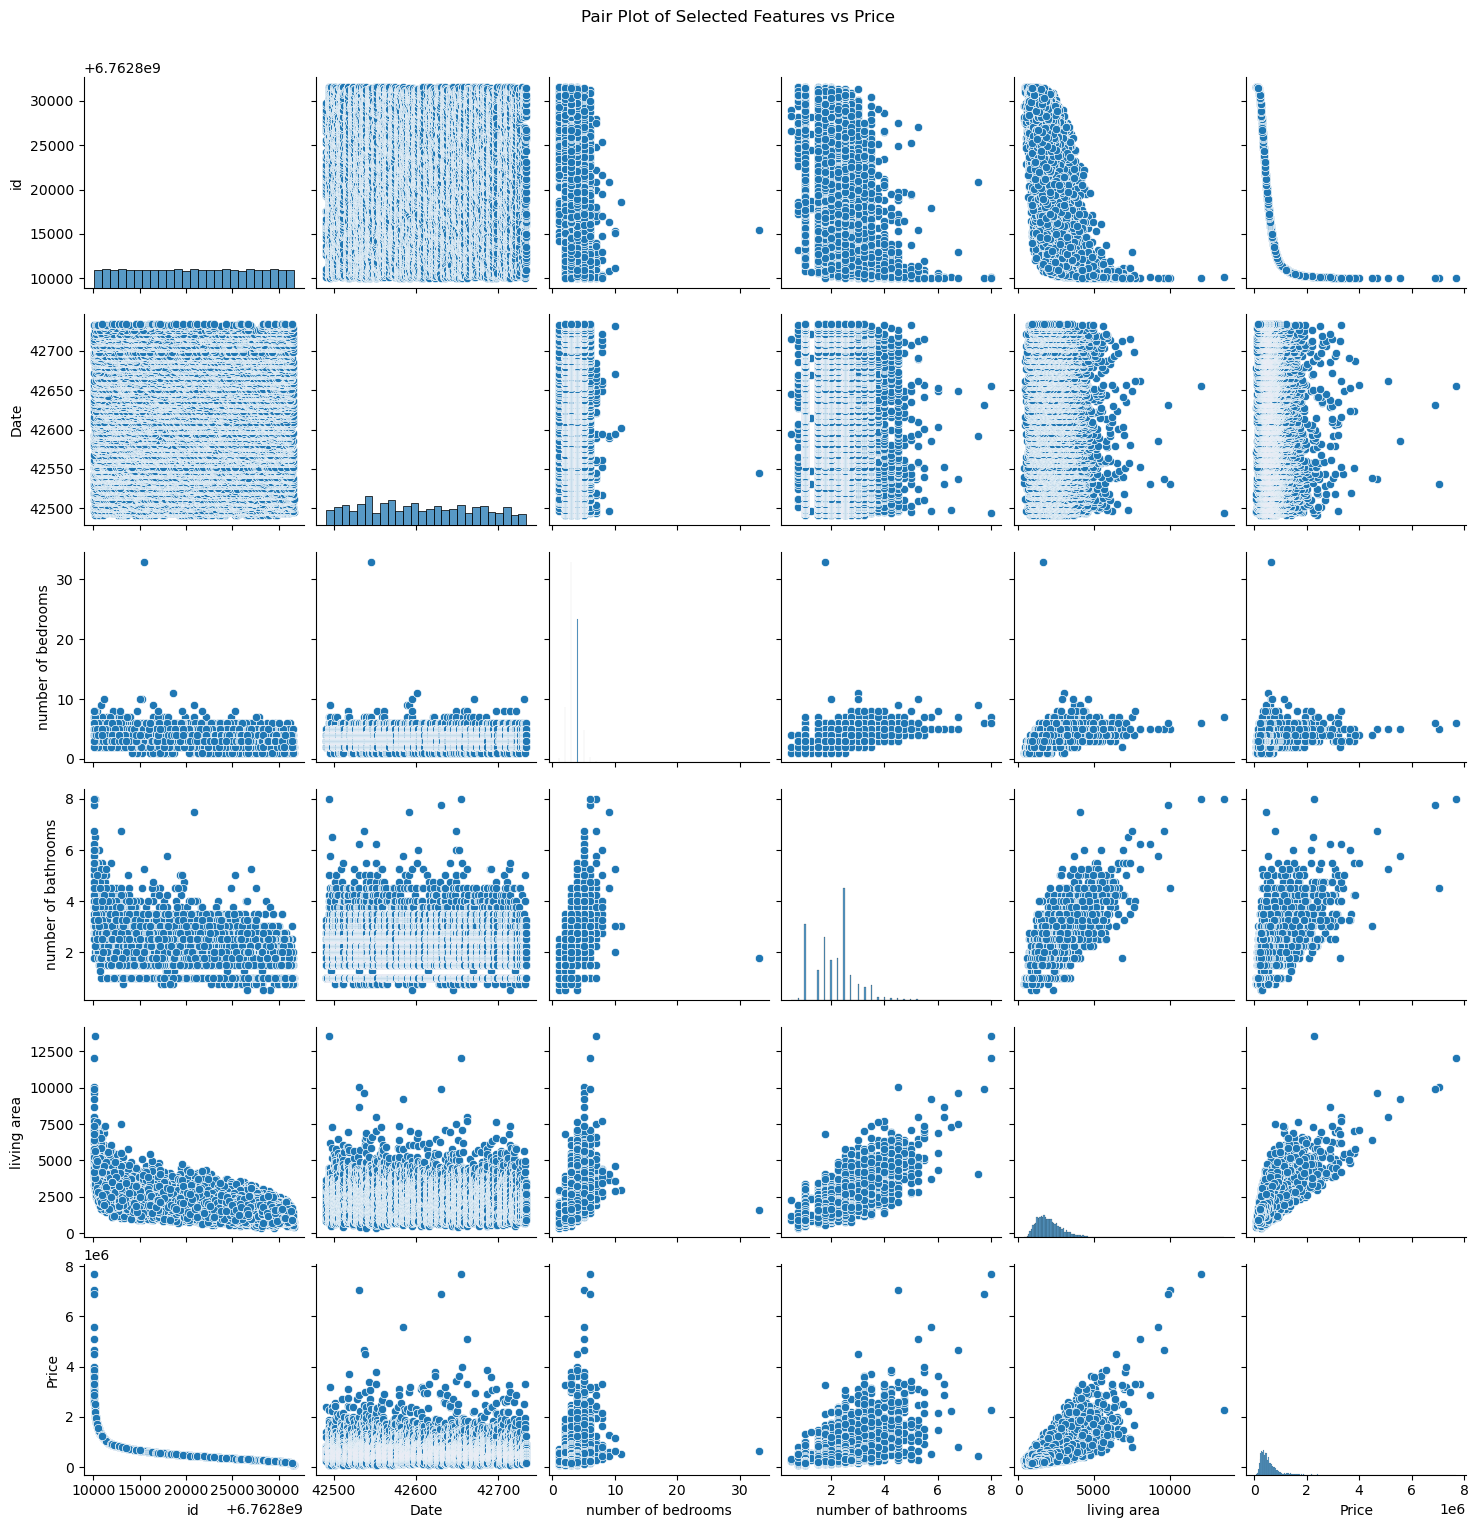

In [13]:
# Pair plot for analysis
# Select numeric columns including target
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Optional: limit to top 5 numeric features to avoid overcrowding
numeric_cols = numeric_cols[:5] + [target] if target not in numeric_cols[:5] else numeric_cols[:5]

sns.pairplot(df[numeric_cols])
plt.suptitle("Pair Plot of Selected Features vs Price", y=1.02)
plt.show()

In [12]:
# Save model and features
joblib.dump(model, "house_price_model.pkl")
joblib.dump(X.columns, "model_features.pkl")

['model_features.pkl']